In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


# analysis

In [2]:
datasetName="/stor/public/hcad/lung_lung_HCLFetalLung1/lung_lung_HCLFetalLung1"

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv.gz"),header = TRUE, sep='\t',row.names = 1)

In [6]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [7]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [8]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.3547”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.1013e-15”Centering and scaling data matrix


In [9]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  CLDN5, PECAM1, CD93, CDH5, ESAM, SDPR, EGFL7, KDR, PCAT19, TM4SF1 
	   TIE1, EPAS1, APLNR, ECSCR, CD34, GIMAP4, IL33, CALCRL, RNASE1, HPGD 
	   COL4A1, SOX7, RAMP2, HLA-B, IGFBP4, CLEC14A, LYVE1, TSPAN18, HLA-E, VWF 
Negative:  HMGB2, HIST1H4C, CD3D, TRBC1, COL1A1, TRBC2, CD1B, LCP1, ADH1B, CD1E 
	   KIAA0101, CD52, RP11-144L1.4, UBE2T, CD8B, RP11-620J15.3, MZB1, UBE2C, PTTG1, MAD2L1 
	   CD3E, PTCRA, CDK1, CCNB2, LGALS1, AIF1, NUSAP1, TRDC, CD1C, SH2D1A 
PC_ 2 
Positive:  LGALS1, COL1A1, FN1, SPARC, COL1A2, A2M, ADH1B, PLAC9, OGN, FOS 
	   COL3A1, ELN, MGP, FSTL1, MT-RNR1, VIM, MYLK, ACTA2, CXCL12, COL5A1 
	   POSTN, COL5A2, MYL9, TAGLN, TPM2, TPM1, PPP1R14A, MEG3, ACTG2, VTRNA2-1 
Negative:  LCP1, CD3D, ARHGDIB, TRBC1, CD1B, CD52, TRBC2, HMGA1, AIF1, CD1E 
	   TMSB4X, MT-CO2, CD8B, MZB1, PTMA, ADA, RP11-144L1.4, TRDC, SH2D1A, RP11-620J15.3 
	   CD3E, CD1C, RAC2, GMFG, IL2RG, TCF7, CORO1A, LTB, HMGB2, RHOH 
PC_ 3 
Positive:  TPPP3, EPCAM, CPM, KRT19, SPINT2, NPC2, SF

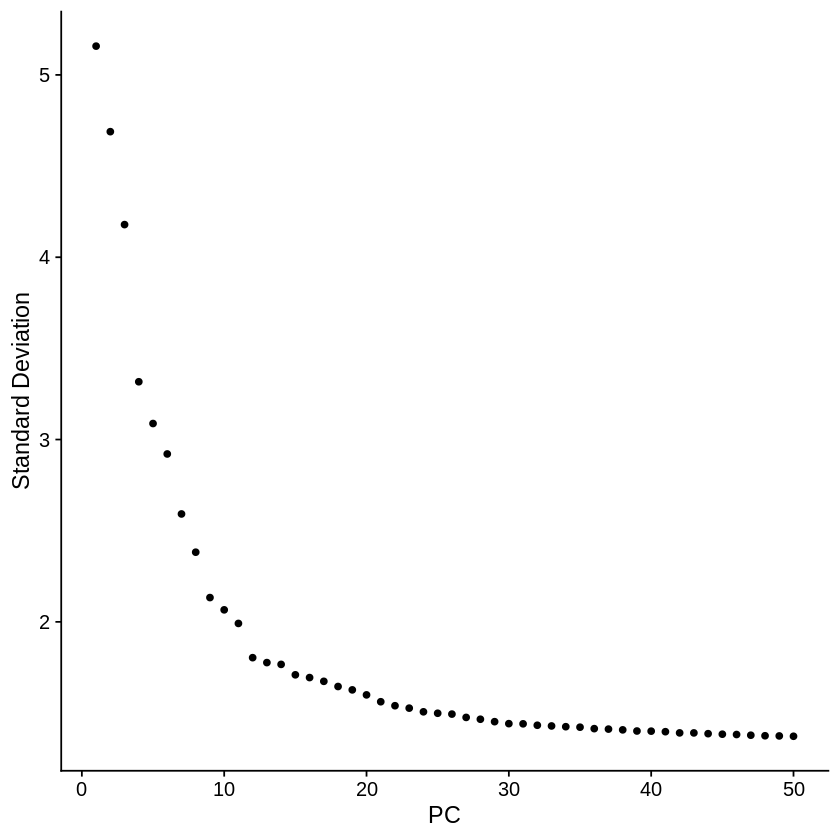

In [10]:
ElbowPlot(dataobj,50) 

In [11]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”19:59:08 UMAP embedding parameters a = 0.9922 b = 1.112
19:59:08 Read 4526 rows and found 30 numeric columns
19:59:08 Using Annoy for neighbor search, n_neighbors = 30
19:59:08 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
19:59:09 Writing NN index file to temp file /tmp/Rtmpkfu3EL/file71d63340ed53
19:59:09 Searching Annoy index using 1 thread, search_k = 3000
19:59:11 Annoy recall = 100%
19:59:11 Commencing smooth kNN distance calibration using 1 thread
19:59:12 Initializing from normalized Laplacian + noise
19:59:12 Commencing optimizatio

In [12]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

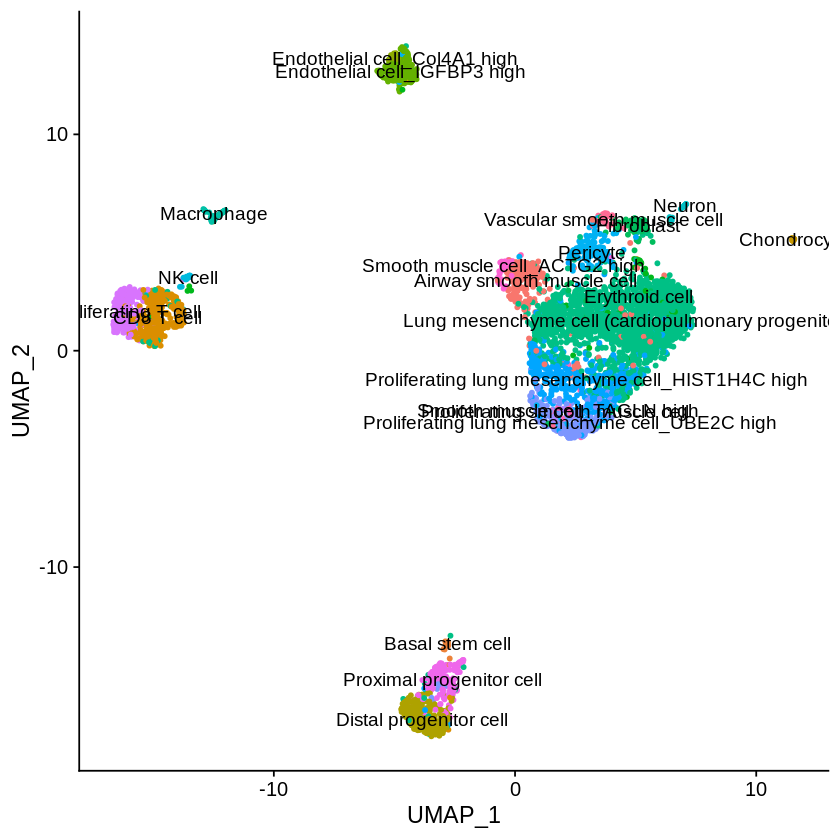

In [13]:
p_umap2

# Clustering

In [14]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [18]:
dataobj <- FindClusters(dataobj, resolution = 2, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4526
Number of edges: 207972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7049
Number of communities: 21
Elapsed time: 0 seconds


In [5]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

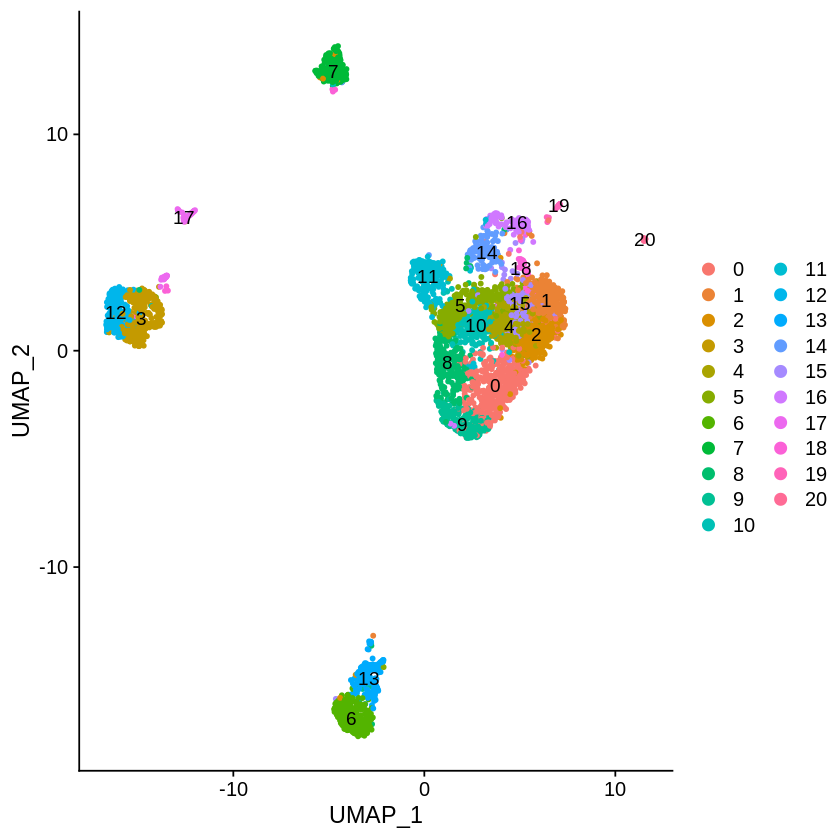

In [6]:
p_umap

# Finding cluster markers 

In [21]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20


# Annotation

In [7]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [4]:
dataobj.markers <- read.table(paste0(datasetName,".seurat.markers.txt"), sep = "\t", h = T)

In [93]:
dataobj.markers[dataobj.markers['cluster']==4,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
280,6.958251e-20,0.4039808,0.864,0.810,1.766491e-15,4,RPL6P27
281,1.239852e-15,0.5133557,0.646,0.537,3.147613e-11,4,GAS5
282,2.891031e-15,0.3517132,0.829,0.790,7.339461e-11,4,RPL10A
283,5.956859e-11,0.2962605,0.845,0.848,1.512268e-06,4,RPL9
284,1.327951e-10,0.3069594,0.797,0.788,3.371270e-06,4,RPL23
285,8.366365e-10,0.3659252,0.693,0.629,2.123969e-05,4,RP11-234A1.1
286,9.310811e-10,0.2890429,0.813,0.784,2.363735e-05,4,RPL24
287,8.828148e-09,0.2932114,0.794,0.763,2.241202e-04,4,RPS28
288,9.129472e-09,0.2854332,0.737,0.713,2.317699e-04,4,RPS9


In [90]:
    dataobj.markers[dataobj.markers['gene']=='HAPLN1',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1908,0,3.791878,0.947,0.006,0,20,HAPLN1


In [8]:
new.cluster.ids <- c('Lung-Connective Tissue-Mesenchymal cell-HIST1H4C',#0
                     'Lung-Connective Tissue-Fibroblast-DCN LUM',
                     'Lung-Connective Tissue-Fibroblast-DCN LUM',
                     'Lung-Connective Tissue-T cell-CD3D CD1C',
                     'Lung-Connective Tissue-Mesenchymal cell-RPS18',
                     'Lung-Connective Tissue-Mesenchymal cell-MALAT1',#5
                     'Lung-Epithelial Tissue-Distal progenitor cell-SFTPC',#to be AT1 and AT2
                     'Lung-Epithelial Tissue-Endothelial cell-POSTN CLDN5',
                     'Lung-Connective Tissue-Mesenchymal cell-HIST1H4C',
                     'Lung-Connective Tissue-Mesenchymal cell-HIST1H4C UBE2C',
                     'Lung-Connective Tissue-Mesenchymal cell-RPS18',#10
                     'Lung-Musle Tissue-Smooth muscle cell-ACTA2 MYL9',
                     'Lung-Connective Tissue-T cell-CD3D CD1C',
                     'Lung-Epithelial Tissue-Proximal progenitor cell-KRT8 KRT19',# to be Epithelial cell
                     'Lung-Epithelial Tissue-Pericyte-PDGFRB',
                     'Lung-Connective Tissue-Fibroblast-DCN LUM',#15
                     'Lung-Musle Tissue-Smooth muscle cell-ACTA2 MYL9',
                     'Lung-Connective Tissue-Macrophage-S100A8',
                     'Lung-Connective Tissue-Neutrophilic granulocyte-HBA2 HBB',
                     'Lung-Nerve tissue-Neuron-LINC00682',
                     'Lung-Cartiage tissue-Chondrocyte-HAPLN1'#20
                     
                   )

In [9]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

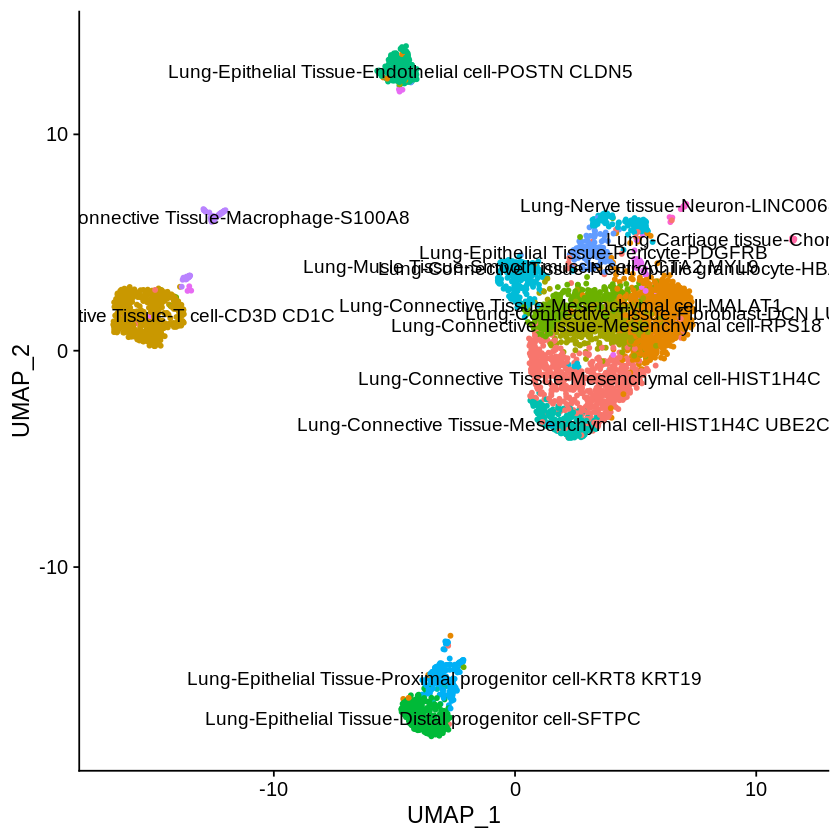

In [10]:
plot

In [97]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [11]:
dataobj$hcad.label <- Idents(dataobj)

In [98]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [99]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [13]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [101]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [102]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# update annotation

In [83]:
dataobj <- readRDS("/stor/public/hcad/db_v1/lung_lung_HCLFetalLung1/lung_lung_HCLFetalLung1.seuratobj.dbupload_v1.rds")

In [84]:
dataobj

An object of class Seurat 
43878 features across 4526 samples within 1 assay 
Active assay: RNA (43878 features, 0 variable features)

In [85]:
table(dataobj$original_name[dataobj$hcad_name == "Lung-Connective tissue-Neutrophilic granulocyte-HBA2 HBB"])


                        Airway smooth muscle cell 
                                                2 
                           Distal progenitor cell 
                                                1 
                     Endothelial cell_IGFBP3 high 
                                                2 
                                   Erythroid cell 
                                               28 
                                       Fibroblast 
                                                3 
Lung mesenchyme cell (cardiopulmonary progenitor) 
                                               11 
 Proliferating lung mesenchyme cell_HIST1H4C high 
                                                2 
    Proliferating lung mesenchyme cell_UBE2C high 
                                                1 

In [86]:
dataobj$cell_type[dataobj$hcad_name == "Lung-Connective tissue-Neutrophilic granulocyte-HBA2 HBB"] <- "NA"
dataobj$tissue_type[dataobj$hcad_name == "Lung-Connective tissue-Neutrophilic granulocyte-HBA2 HBB"] <- "NA"
dataobj$marker_gene[dataobj$hcad_name == "Lung-Connective tissue-Neutrophilic granulocyte-HBA2 HBB"] <- "NA"
dataobj$hcad_name[dataobj$hcad_name == "Lung-Connective tissue-Neutrophilic granulocyte-HBA2 HBB"] <- "Unknown"

In [87]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/lung_lung_HCLFetalLung1/lung_lung_HCLFetalLung1.seuratobj.dbupload_v1.rds")